<a href="https://colab.research.google.com/github/Supreme-YS/ML/blob/main/cross_validation_ml%5B02%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

교차 검증을 간단하게 하는 방법
- 프로세스 ( fold 설정 -> 루프 반복을 통해서 학습 및 테스트의 인덱스 추출 -> 학습과 예측 )
- cross_val_score(예측모델, 피처세트, 레이블, 성능평가 지표, 폴드수) 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [8]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
data     = iris_data.data
label    = iris_data.target

In [13]:
dt_clf = DecisionTreeClassifier(random_state=100)

# 성능평가지표는 acc, 교차검증 5개
scores = cross_val_score(dt_clf, data, label, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [18]:
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

평균 검증 정확도 :  0.9533


In [19]:
scores = cross_validate(dt_clf, data, label, cv=5, scoring='accuracy')
scores

{'fit_time': array([0.0021131 , 0.00171137, 0.00270081, 0.00123382, 0.00085497]),
 'score_time': array([0.00058079, 0.00053787, 0.00052571, 0.00044727, 0.00029802]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

교차검증과 하이퍼파라미터를 한 번에 할 수 있는 방법
- GridSearchCV

- 엔트로피 이해

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 샘플 데이터 생성
grp01 = np.array([0.3, 0.4, 0.3])
grp02 = np.array([0.7, 0.2, 0.1])
grp03 = np.array([0.01, 0.01, 0.98])

In [25]:
from IPython.display import Image
Image('c:/img/enptropy.png', width= 700)

In [27]:
# 만약 3개 Yes 이고 2개 No 일 때, 엔트로피
# H = -(2/5)log(2/5)-(3/5)log(3/5) = 0.971

In [28]:
def entropy(x):
    return (-x*np.log2(x)).sum()

In [30]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

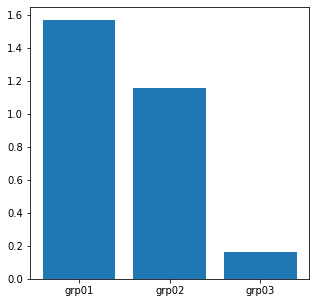

In [32]:
plt.figure(figsize=(5,5))
plt.bar(['grp01', 'grp02', 'grp03'], [e01, e02, e03])
plt.show()
plt.close()

In [33]:
import graphviz

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수 (과적합을 제어할 때 사용)
- min_samples_leaf : 리프노드가 되기위한 최소한의 샘플 수 (과적합을 제어할 때 사용)
- max_features : feature의 갯수
- max_depth : tree의 최대 깊이
- max_leaf_nodes : 리프 노드의 최대 수

In [48]:
# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=100, criterion='entropy', max_depth = 3)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

In [49]:
# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, 
                out_file = 'iris_tree.dot', 
                class_names = iris_data.target_names,
                feature_names = iris_data.feature_names,
                impurity = True,
                filled = True)

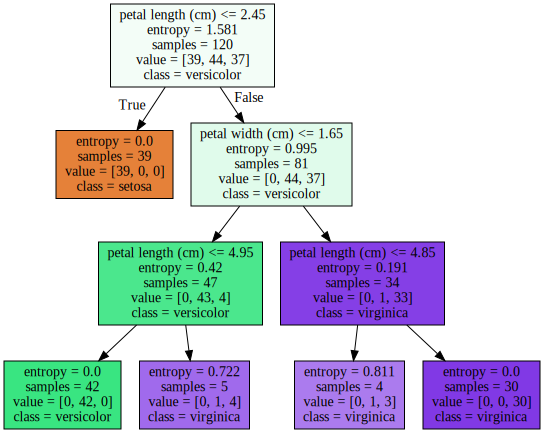

In [51]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('iris_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Grid Search CV ( estimator , param_grid .....etc )

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

- estimator : 분류기(알고리즘)
- param_grid : { param : value, param : value....} 
- scoring : 평가방법을 지정
- refit : True( 최적의 하이퍼 파라미터를 찾는 재학습 ) 

In [52]:
#grid_parameter = {'max_depth' : [1,2,3] , 
                  #'min_samples_split' : [2, 3]}

In [53]:
# pd.read_csv('Grid.csv', index_col='순번')

In [57]:
dt_clf = DecisionTreeClassifier(random_state=100)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

grid_parameter = {'max_depth' : [1,2,3] , 
                  'min_samples_split' : [2, 3]}

In [59]:
dt_searchCV = GridSearchCV(dt_clf, param_grid = grid_parameter, cv = 3, refit=True)
dt_searchCV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},


In [60]:
dt_searchCV.cv_results_

{'mean_fit_time': array([0.00155973, 0.0007836 , 0.00083717, 0.0007635 , 0.00071414,
        0.00064468]),
 'mean_score_time': array([0.00041509, 0.00031908, 0.00040634, 0.00030923, 0.00029016,
        0.00025519]),
 'mean_test_score': array([0.69166667, 0.69166667, 0.95      , 0.95      , 0.975     ,
        0.975     ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3}],
 'rank_test_score': array([5, 5, 3, 3, 1, 1], 

In [61]:
scoreDF = pd.DataFrame(dt_searchCV.cv_results_)
scoreDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001560,0.000813,0.000415,0.000130,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.70,0.700,0.675,0.691667,0.011785,5
1,0.000784,0.000033,0.000319,0.000026,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.70,0.700,0.675,0.691667,0.011785,5
2,0.000837,0.000040,0.000406,0.000097,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,0.900,1.000,0.950000,0.040825,3
3,0.000763,0.000039,0.000309,0.000011,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,0.900,1.000,0.950000,0.040825,3
4,0.000714,0.000007,0.000290,0.000021,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.95,0.975,1.000,0.975000,0.020412,1
5,0.000645,0.000007,0.000255,0.000005,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.95,0.975,1.000,0.975000,0.020412,1


In [63]:
scoreDF[['params', 'rank_test_score']] # 튜닝할 때 max_depth : 3 , min_samples_split: 2, 3 의 성능이 최고라는 걸 표현해주는 것

,params,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5
1,"{'max_depth': 1, 'min_samples_split': 3}",5
2,"{'max_depth': 2, 'min_samples_split': 2}",3
3,"{'max_depth': 2, 'min_samples_split': 3}",3
4,"{'max_depth': 3, 'min_samples_split': 2}",1
5,"{'max_depth': 3, 'min_samples_split': 3}",1


In [66]:
print('최적의 파라미터 :', dt_searchCV.best_params_)
print('최적의 정확도 :', dt_searchCV.best_score_)
print('최적의 Estimator :', dt_searchCV.best_estimator_)

최적의 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도 : 0.975
최적의 Estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [67]:
model = dt_searchCV.best_estimator_
pred = model.predict(X_test)

print('모델 정확도 : ', accuracy_score(y_test, pred))

모델 정확도 :  0.9666666666666667
